In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Домашнее задание 2

Дедлайн: 19.03.2021, 2359

## Методы интегрирования (30 баллов)

Пусть $f: R \to R$ -- некоторая (достаточно) гладкая функция, с известными значениями $f(x_i)$ в точках $x_i$. Требуется вычислить интеграл
$$
\int_a^b f(x) dx.
$$
Для этого будем использовать составные формулы Ньютона-Котеса.

### Составные формулы для произвольной сетки

Будем полагать сетку произвольной, если сетка равномерная (что на практике бывает не всегда), то формулы хорошо известны.

#### Запись формул (5 баллов)

Формулы Ньютона-Котеса -- формулы, которые получаются при интегрировании интерполяционного многочлена. Пусть мы используем $K$ элементарных отрезков, на каждом из которых есть $n$ узлов (включая два крайних). Выпишите простую и составную формулу интегрирования. 

#### ВАШЕ РЕШЕНИЕ ЗДЕСЬ

*Запишем интерполяционный многочлен Ньютона и распишем произведение:*

$$N_{n}(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + ... + a_n(x-x_0)(x-x_1)...(x-x_{n-1})=\sum\limits_{p=0}^{n}a_p\prod_{j=0}^{p-1}(x-x_j)$$

$$\prod_{j=0}^{p-1}(x-x_j) = \sum\limits_{d=0}^{p}\biggr(x^d \underbrace{(-1)^{p-d} \cdot \sum_{\substack{ j_1,...,j_{p-d} = \overline{0,p-1} \\ j_1 < j_2 <...<j_{p-d}} }x_{j_1}x_{j_2}...x_{j_{p-d}}}_{c_{p,d}}\biggr)$$

$$N_{n}(x) = \sum\limits_{p=0}^{n}a_p(x^p + c_{p,p-1}x^{p-1} + ... c_{p,1}x + c_{p,0}) = \sum\limits_{p=0}^{n}a_p\sum\limits_{d=0}^{p}x^d c_{p,d}$$

*Простая формула на отрезке $[x_k, x_{k+1}]$:*

$$I_k = \int\limits_{x_k}^{x_{k+1}}N_{n}^{k}(x)\,dx = \int\limits_{x_k}^{x_{k+1}}\sum\limits_{p=0}^{n}a_p^k\sum\limits_{d=0}^{p}x^d c^k_{p,d}\,dx = \sum\limits_{p=0}^{n}a_p^k\sum\limits_{d=0}^{p}c^k_{p,d}\frac{x_{k+1}^{d+1} - x_k^{d+1}}{d+1}$$

*$a^k, c^k$ - обозначения параметров (не возведение в степень $k$) для конкретного отрезка $[x_k, x_{k+1}]$*

*Составная формула:*
$$\int\limits_{a}^{b}f(x)\,dx \approx \sum\limits_{k=0}^{K-1}I_k = \sum\limits_{k=0}^{K-1}\sum\limits_{p=0}^{n}a_p^k\sum\limits_{d=0}^{p}c^k_{p,d}\frac{x_{k+1}^{d+1} - x_k^{d+1}}{d+1}$$
Выпишите аналогичные формулы, которые получаются при интерполировании функции $f$ кубическим сплайном дефекта 1.

#### ВАШЕ РЕШЕНИЕ ЗДЕСЬ
*Выпишем формулу интерполяции кубическим сплайном дефекта 1:*

$$f(x) \approx \sum\limits_{k=0}^{K-1}S_k = \sum\limits_{k=0}^{K-1}\sum\limits_{i=0}^{n-1}\left(\frac{1}{6\tau^{k}_{i}}(m^{k}_{i}(x^{k}_{i+1}-x)^3 + m^{k}_{i+1}(x-x^{k}_{i})^3) + a^{k}_{i} x + b^{k}_{i}\right)I\{x \in [x^{k}_{i}, x^{k}_{i+1}]\}$$

*Найдём формулу интегрирования на одном из $n-1$ отрезков $[x^{k}_{i}, x^{k}_{i+1}]$ из элементарного отрезка $[x_k, x_{k+1}]$ ($k, i$ - индексы):*

$$I^{k}_{i} = \int\limits_{x^{k}_{i}}^{x^{k}_{i+1}}S^{k}_{i}\,dx = \left(\frac{1}{24\tau^{k}_{i}}(-m^{k}_{i}(x^{k}_{i+1}-x)^4 + m^{k}_{i+1}(x-x^{k}_{i})^4) + \frac{a^{k}_{i} x^2}{2} + b^{k}_{i}x\right) \Biggr\rvert_{x^{k}_{i}}^{x^{k}_{i+1}}=$$
$$=\frac{(\tau^{k}_{i})^3}{24}(m^{k}_{i} + m^{k}_{i+1}) + \frac{a^{k}_{i} \tau^{k}_{i}(x^{k}_{i} + x^{k}_{i+1})}{2} + b^{k}_{i} \tau^{k}_{i}$$

*Тогда простая формула (на элементарном отрезке $[x_k, x_{k+1}]$) равна:*
$$I_k = \sum\limits_{i=0}^{n-1}I^{k}_{i} = \sum\limits_{i=0}^{n-1}\left(\frac{(\tau^{k}_{i})^3}{24}(m^{k}_{i} + m^{k}_{i+1}) + \frac{a^{k}_{i} \tau^{k}_{i}(x^{k}_{i} + x^{k}_{i+1})}{2} + b^{k}_{i} \tau^{k}_{i}\right)$$

*Запишем составную формулу:*
$$\int\limits_{a}^{b}f(x)\,dx \approx \sum\limits_{k=0}^{K-1}I_k = \sum\limits_{k=0}^{K-1}\sum\limits_{i=0}^{n-1}\left(\frac{(\tau^{k}_{i})^3}{24}(m^{k}_{i} + m^{k}_{i+1}) + \frac{a^{k}_{i} \tau^{k}_{i}(x^{k}_{i} + x^{k}_{i+1})}{2} + b^{k}_{i} \tau^{k}_{i}\right)=$$
$$=\sum\limits_{k^{\prime}=0}^{nK - (K-1)}\left(\frac{\tau_{k^{\prime}}^3}{24}(m_{k^{\prime}} + m_{k^{\prime}+1}) + \frac{a_{k^{\prime}} \tau_{k^{\prime}}(x_{k^{\prime}} + x_{k^{\prime}+1})}{2} + b_{k^{\prime}} \tau_{k^{\prime}}\right)$$

#### Программная реализация (10 баллов)

Реализуйте два метода интегрирования: с кубическими сплайнами дефекта 1 и с формулами Ньютона-Котеса. Для вычисления коэффициентов интерполяции можете использовать готовые решения из предыдущих домашних и семинарских работ.

In [315]:
#YOUR CODE everywhere
class NewtonPolyInterpolator:
    #recall the code from seminars, beware of possible errors there
    def __init__(self,xGrid,fGrid):
        #Computes spline coefficients
        #xGrid float64 [N]
        #fGrid float64 [N]
        self.xGrid = xGrid
        self.fGrid = fGrid
        self.ComputeCoefs(self.xGrid, self.fGrid)
    
    def ComputeDifferences(self):
        self.diffs = [self.fGrid]
        for i in np.arange(1, len(self.fGrid)):
            diff = np.array([(self.diffs[-1][k+1]-self.diffs[-1][k]) / (self.xGrid[i+k]-self.xGrid[k])\
                            for k in np.arange(len(self.diffs[-1])-1)])
            self.diffs = self.diffs + [diff]
    
    def ComputeCoefs(self, xs, fs):
        self.ComputeDifferences()
        self.coefs = np.array([self.diffs[k][0] for k in np.arange(len(self.diffs))])
    
class PiecewiseNewtonInterpolator:
    def __init__(self,xs,fs,n=1):
        #IN:
        # xs [K*n - (K-1)]
        # fs [K*n - (K-1)]  -- interpolation grid
        # n -- degree of interpolant+1 (K=2 means we use linear functions)
        #Store the list of coefficients corresponding to elementary ranges
        self.xs = xs
        self.fs = fs
        self.n = n
        self.coefs = self.ComputeCoefs(xs, fs)
        
    def ComputeCoefs(self, xs, fs):
        coefs = []
        for k in range((len(xs)-1)//(self.n-1)):
            subgrid = range(k * (self.n - 1), (k + 1) * (self.n - 1) + 1)
            interp = NewtonPolyInterpolator(xs[subgrid], fs[subgrid])
            coefs.append(interp.coefs)
        return coefs
    
    def Compute(self,xs):
        #IN:
        # xs [batch]
        #OUT:
        # interpFs [batch] -- values of interpolant in points xs
        res = []
        n = len(self.xs[::self.n - 1]) - 1
        itrv_idx = np.searchsorted(self.xs[::self.n-1], xs, side='right') - 1
        itrv_idx[itrv_idx == n] -= 1    # n + 1 to n

        for x, itrv in zip(xs, itrv_idx):
            subgrid = self.xs[range(itrv * (self.n - 1), (itrv + 1) * (self.n - 1) + 1)]
            vals = np.cumprod(x-subgrid[None,:], axis=-1)[:,:-1]
            vals = np.concatenate([np.ones([1,1]), vals], axis=-1)
            res.append((vals @ self.coefs[itrv])[0])
        return res
    
class CubicSplineInterpolator:
    def __init__(self,xs,fs):
        #IN:
        # xs [n]
        # fs [n]  -- interpolation grid
        #Store the list of coefficients corresponding to elementary ranges

        self.sppa= 0
        self.sppb= 0
        self.xs = xs #you will need it
        self.coeffs = self.ComputeCoefficients(xs,fs)
    
    def tdma(self, a, b, c, f):
        n = len(f)
        # calculate alpha, beta (forward pass)
        alpha = [-c[0] / b[0]]
        beta = [f[0] / b[0]]
        for i in range(1,n):
            alpha.append(-c[i]/(a[i]*alpha[i-1] + b[i]))
            beta.append((f[i] - a[i]*beta[i-1])/(a[i]*alpha[i-1]+b[i]))

        # calculate x (backward pass)
        x = np.zeros(n)
        x[n-1] = beta[n-1]

        for i in range(n-2, -1, -1):
            x[i] = alpha[i] * x[i+1] + beta[i]

        return x

    def ComputeCoefficients(self,xGrid,fGrid):
        #returns coefficients for cubic spline based on interpolation Grid
        #input
        #    xGrid float64 [N]
        #    fGrid float64 [N]
        #output
        #    coeffs
        
        #Your code here
        
        taus = xGrid[1:] - xGrid[:-1]
        n = len(taus)    # n + 1 points, n intervals
        
        # calculate tridiagonal system of equations using tdma
        a = np.concatenate((np.zeros(1), taus[1:n-1] / 6))
        b = (taus[:n-1] + taus[1:]) / 3
        c = np.concatenate((taus[1:n-1] / 6, np.zeros(1)))
        f = (fGrid[2:] - fGrid[1:n]) / taus[1:] - (fGrid[1:n] - fGrid[:n-1]) / taus[:n-1]
        m_coefs = self.tdma(a, b, c, f)    # m_1, ..., m_{n-1}
        m_coefs = np.concatenate((np.array([self.sppa]), m_coefs, np.array([self.sppb])))    # m_0,...,m_n
        a_coefs = (fGrid[1:] - fGrid[:n]) / taus - (m_coefs[1:] - m_coefs[:n]) * taus / 6
        b_coefs = fGrid[:n] - m_coefs[:n] * (taus ** 2) / 6 - a_coefs * xGrid[:n]
        self.coefs = (m_coefs, a_coefs, b_coefs)
        return self.coefs
        
    def Compute(self,xs):
        #IN:
        # xs [batch]
        #OUT:
        # interpFs [batch] -- values of interpolant in points xs
        n = len(self.xs) - 1
        m, a, b = self.coefs
        taus = self.xs[1:] - self.xs[:-1]
        intervals_idx = np.searchsorted(self.xs, xs, side='right') - 1
        intervals_idx[intervals_idx == n] -= 1    # n + 1 to n
        return 1 / (6 * taus[intervals_idx]) * (m[intervals_idx] * (self.xs[intervals_idx + 1] - xs)**3 + \
                                                m[intervals_idx + 1] * (xs - self.xs[intervals_idx])**3) + \
                                                a[intervals_idx] * xs + b[intervals_idx]    
    #you can take the interpolants from the previous assignments
    #boundary conditions: set as S''(a)=S''(b)=0    

    
def NewtonCotesIntegral(xs,fs,n=1):
        #IN:
        # xs [K*n - (K-1)]
        # fs [K*n - (K-1)]  -- interpolation grid
        # n -- degree of interpolant+1 (n=2 means we use linear functions)
        #OUT:
        # number 
        #YOUR CODE
        
        #(1) Compute interpolation coefficients
        #(2) Compute approximately the integral using the formulas above

        newt_interp = PiecewiseNewtonInterpolator(xs, fs, n)
        a_list = newt_interp.coefs
        xs_big_idx = range(0,len(xs),n-1)
        res = 0
        for i,a in enumerate(a_list):
            vals = []
            for p,a_ in enumerate(a):
                cs = []
                for d in range(p+1):
                    c = 0
                    for subset_idx in combinations(range(p), p-d):
                        c += np.prod(xs[xs_big_idx[i]:xs_big_idx[i+1]][list(subset_idx)])
                    cs.append(c * (-1) ** (p-d) * (xs[xs_big_idx][i+1]**(d+1)-xs[xs_big_idx][i]**(d+1)) / (d+1))
                vals.append(np.sum(cs))
            res += np.array(vals).T @ a
        return res
        
def CubicSplineIntegral(xs,fs):
        #IN:
        # xs [n]
        # fs [n]  -- interpolation grid
        #OUT:
        # number 
        #YOUR CODE
        
        #(1) Compute interpolation coefficients
        #(2) Compute approximately the integral using the formulas above

        spline_interp = CubicSplineInterpolator(xs, fs)
        n = len(xs) - 1
        m, a, b = spline_interp.coefs
        taus = spline_interp.xs[1:] - spline_interp.xs[:-1]
        itrv_idx = np.searchsorted(xs, xs, side='right') - 1
        itrv_idx[itrv_idx == n] -= 1    # n + 1 to n
        
        return np.sum(taus[itrv_idx] * (m[itrv_idx] + m[itrv_idx + 1]) / 24 \
            + a[itrv_idx]*(xs[itrv_idx+1]**2 - xs[itrv_idx]**2) / 2 + b[itrv_idx] * taus[itrv_idx])
    

Протестируем.

In [244]:
def testF(x):
    return np.exp(-x)

#integrate this function with your methods and compare to true answer
#!!example
#eps=0.001
#assert np.abs(someTrueVal-CubicSplineIntegral(some parameters))<eps


In [317]:
import scipy.integrate as integrate
true_val = integrate.quad(testF, 1, 15)[0]

In [330]:
knots_num = 10
x0=1
x1=15
h = (x1 - x0) / (knots_num - 1)
xs = np.arange(x0, x1 + h / 2, h)
fs = testF(xs)

In [331]:
print('Cubic spline error:%.4f' % np.abs(CubicSplineIntegral(xs,fs) - true_val))

Cubic spline error:0.0003


In [332]:
print('Newton-Cotes error:%.4f' % np.abs(NewtonCotesIntegral(xs,fs,3) - true_val))

Newton-Cotes error:0.0092


#### Исследование сходимости (15 баллов)

Для функции, приведённой ниже, нарисуйте ошибку интегрирования $\left\vert \int_a^b f(x)dx - Integrator(xs,fs) \right\vert$ для реализованных интеграторов при разных сетках на элементарных отрезках (равномерная, чебышёвская) и разном числе узлов $N$. В качестве разных методов на формулах Ньютона-Котеса используйте $K=1,2,3,5,7$.  Какой метод является точнее? Попробуйте оценить порядок точности схемы экспериментально с помощью рассмотрения графика в $log-log$ осях. Как с его помощью можно оценить порядок точности?

Примечание: для вычисления точного значения интеграла можете использовать какой-нибудь очень точный метод; например, что-то из scipy.integrate или wolfram.

In [333]:
def testF(x):
    return np.exp(-0.1*x) + 1/x * np.sin(1*np.pi * x)+ np.exp(0.07*x)

# YOUR DRAWINGS HERE AND CONCLUSIONS BELOW

In [345]:
def get_even_grid(x0, x1, n, F, K):
    '''
    K: number of elementary intervals
    n: number of nodes for each interval
    x0, x1: border grid values
    F: function
    '''
    total_n = n * K - (K - 1)
    h = (x1 - x0) / (total_n - 1)
    xs = np.arange(x0, x1 + h / 2, h)
    return xs, F(xs)

def get_cheb_grid (x0, x1, n, F, K):
    '''
    K: number of elementary intervals
    n: number of nodes for each interval
    x0, x1: border grid values
    F: function
    '''
    xs = []
    xs_grid = np.linspace(x0,x1,K+1)
    for k in range(K):
        x0_k, x1_k = xs_grid[k], xs_grid[k+1]
        xs_k = sorted([(x0_k+x1_k) / 2 + (x1_k - x0_k) * np.cos((2 * t - 1) / (2 * n) * np.pi) / 2 
                              for t in range(1, n+1)])
        if not xs:
            xs += xs_k
        else:
            xs[-1] = (xs[-1]+xs_k[0])/2
            xs+=(xs_k[1:])
    xs = np.array(xs)
    return xs, F(xs)

In [380]:
total_grid = np.logspace(1,3,50)
n_grid = [2,3,5,7]
errors_cheb = []
errors_even = []

for N in tqdm(total_grid):    # total number of points
    errors_cheb.append([])
    errors_even.append([])
    for n in n_grid:    # number of points per interval
        K = int((N-1)//(n-1))
#         N_ = n * K - (K - 1)
        cheb_xs, cheb_fs = get_cheb_grid(1,50, n, testF, K)
        even_xs, even_fs = get_even_grid(1,50, n, testF, K)
        
        errors_cheb[-1].append(abs(NewtonCotesIntegral(cheb_xs,cheb_fs,n) - integrate.quad(testF, cheb_xs[0], cheb_xs[-1])[0]))
        errors_even[-1].append(abs(NewtonCotesIntegral(even_xs,even_fs,n) - integrate.quad(testF, even_xs[0], even_xs[-1])[0]))

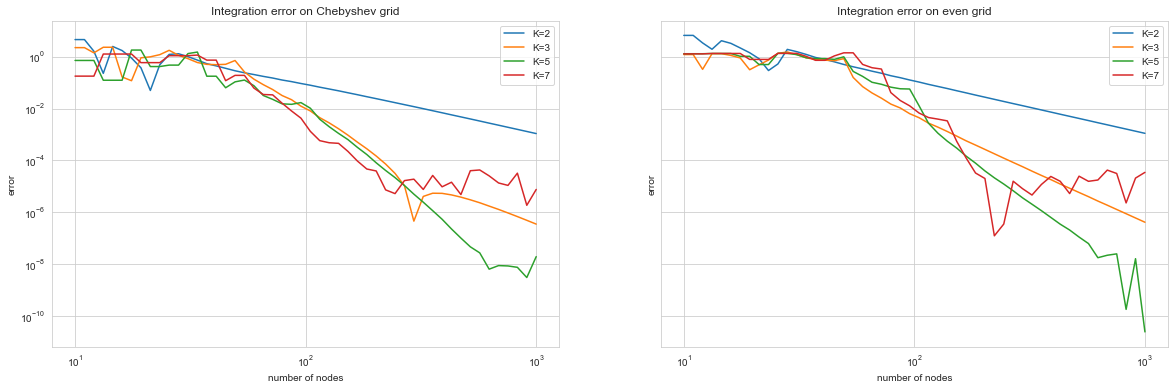

In [383]:
fig, axs = plt.subplots(1,2, figsize=(20,6),sharey=True)
axs[0].plot(total_grid,[el[0] for el in errors_cheb],label='K=2')
axs[0].plot(total_grid,[el[1] for el in errors_cheb],label='K=3')
axs[0].plot(total_grid,[el[2] for el in errors_cheb],label='K=5')
axs[0].plot(total_grid,[el[3] for el in errors_cheb],label='K=7')
axs[0].set_title('Integration error on Chebyshev grid')
axs[0].set(xlabel='number of nodes', ylabel='error')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend()

axs[1].plot(total_grid,[el[0] for el in errors_even],label='K=2')
axs[1].plot(total_grid,[el[1] for el in errors_even],label='K=3')
axs[1].plot(total_grid,[el[2] for el in errors_even],label='K=5')
axs[1].plot(total_grid,[el[3] for el in errors_even],label='K=7')
axs[1].set_title('Integration error on even grid')
axs[1].set(xlabel='number of nodes', ylabel='error')
axs[1].set_yscale('log')
axs[1].set_xscale('log')

plt.legend()
plt.show()

*По графикам можно увидеть, что наиболее удачным является интегрирование полиномов 4-ой степени ($K=5$), а наихудшим - интегрирование линейной функцией ($K=2$). С увеличением количества точек около $N = 100$ ошибка значительно снижается, при этом можно заметить, что после этого порога ошибка на равномерной сетке становится ниже, чем на Чебышёвской - доходит до 1е-7 (с другой стороны, до $N=100$ на Чебышёвской сетке результаты были лучше).*

## Простейшие матричные разложения (70 баллов)

На лекции разбирался метод $LU$-разложения, который является матричной записью метода Гаусса. В этом задании мы исследуем его работу и устойчивость, а также разберём ещё одно важное матричное разложение -- разложение Холецкого. Для простоты будем работать с вещественными квадратными матрицами.

### LU (15 баллов)

Это разложение определено для любой невырожденной $n \times n$ матрицы $A$ и записывается как $A=LU$, где $L$ -- нижнетреугольная $n \times n$ матрица, $U$ -- верхнетреугольная. Почему такое разложение неединственно и как добиться единственности?

Прямое вычисление $LU$ разложения неустойчиво, поэтому обычно дополнительно используют выбор главного элемента по строке и столбцу.

Выведите формулы для вычисления $LU$-разложения и опишите как использовать выбор главного элемента.

#### ВАШЕ РЕШЕНИЕ ЗДЕСЬ
*$A$ - матрица, которую необходимо разложить. Обозначим на нулевом шаге $A^{(0)} := A$*
*На $k$-м шаге элиминируем из матрицы $A^{(k-1)}$ значения $k$-го столбца ниже главной диагонали. Для этого необходимо из каждой строки вычесть $k$-ую строку, домноженную на:*

$$\ell_{i,k} = \frac{a^{(k-1)}_{i,k}}{a^{(k-1)}_{k,k}}$$

*Это эквивалентно домножению на матрицу $A^{(k-1)}$ слева матрицу $L_{k}$:*
$L_n$ - единичная матрица с вектором $\begin{pmatrix}
    0,...,0,1,\ell_{k+1,k},...,\ell_{n,k}
    \end{pmatrix}$ в $n$-ом столбце.
$A^{(k)} = L_k A^{(k-1)}$

*Тогда:*
$$A = \underbrace{L^{-1}_1...L^{-1}_n}_{L}\underbrace{A^{(n-1)}}_{U}$$

*При выборе главного элемента по строкам и столбцам на каждом шаге из нижней правой подматрицы $(A^{(k-1)})_{i=k,j=i}^n$ выбирается максимальный по модулю элемент, потом в матрице переставляют строки и столбцы таким образом, чтобы этот элемент стал на позицию $(k,k)$. Дополнительно необходимо сохранять перестановки по столбцам и строкам.*

Теперь имплементируйте.

In [455]:
def LUDecomposition(A):
    #IN:
    # A [n,n] -- matrix to decompose
    #OUT:
    # LU [n,n] -- matrix decomposition represented as one matrix (think on how to do it!)
    A = A.astype(float)
    n = A.shape[0]
    L = np.identity(n)
    row_piv = np.arange(0,n)
    col_piv = np.arange(0,n)
    for k in range(n-1):
        max_idx = np.argmax(abs(A[k:n,k:n]))
        max_row_index, max_col_index =  max_idx // n + k, max_idx % n + k
        row_piv[[k,max_row_index]] = row_piv[[max_row_index,k]]
        A[[k,max_row_index]] = A[[max_row_index,k]]
        L[[k,max_row_index]] = L[[max_row_index,k]]
        col_piv[[k,max_col_index]] = col_piv[[max_col_index,k]]
        A[[k,max_col_index]] = A[[max_col_index,k]]
        L[[k,max_col_index]] = L[[max_col_index,k]]
#        print(A,L)
#         for i in range(k+1,n):
#             L[i] -= L[k]*A[i,k]/A[k,k]
#             A[i] -= A[k]*A[i,k]/A[k,k]
    for k in range(n-1):                
        for i in range(k+1,n):          
            A[i,k] = A[i,k]/A[k,k]      # " L[i,k] = A[i,k]/A[k,k] "
            for j in range(k+1,n):      
                A[i,j] -= A[i,k]*A[k,j] # " U[i,j] -= L[i,k]*A[k,j] "

    return [A,row_piv,col_piv]

In [522]:
A = np.array([[4.,3.],[6.,3.]])
LUDecomposition(A)

[array([[6.        , 3.        ],
        [0.66666667, 1.        ]]),
 array([1, 0]),
 array([0, 1])]

In [523]:
def LU_no_pivot(A):
    n = A.shape[0]
    for k in range(n-1):                
        for i in range(k+1,n):          
            A[i,k] = A[i,k]/A[k,k]      
            for j in range(k+1,n):      
                A[i,j] -= A[i,k]*A[k,j] 

    return A
LU_no_pivot(A)

array([[ 4. ,  3. ],
       [ 1.5, -1.5]])

### Разложение Холецкого (15 баллов)

Разложение Холецкого определено для любой положительно определённой симметричной матрицы $A$ и определяется как $A=LL^*$, где $L$ -- нижнетреугольная $n \times n$ матрица.

Выведите формулы для вычисления разложения Холецкого.

$$A = L L^T = (L)_{i,j} (L^T)_{i,j} = 
\begin{pmatrix}
\ell_{1,1}^2 &\ell_{1,1}\ell_{2,1}&...&\ell_{1,1}\ell_{n,1}\\
\ell_{1,1}\ell_{2,1}&\ell_{2,1}^2+\ell_{2,2}^2&...\\
...\\
&...&\sum\limits_{i=1}^{n}\ell_{n,i}\ell_{n-1,i}&\sum\limits_{i=1}^{n}\ell_{n,i}^2
\end{pmatrix}
$$

*Отсюда получаем формулы для элементов $L$:*
$$L_{i,i} = \sqrt{A_{i,i}-\sum\limits_{j=1}^{i-1}\ell_{i,j}^2}$$
$$i\neq j: \, L_{i,j} = \frac{1}{L_{j,j}}\biggr(A_{i,j}-\sum\limits_{k=1}^{j-1}\ell_{i,k}\ell_{j,k}\biggr)$$

#### ВАШЕ РЕШЕНИЕ ЗДЕСЬ

Имплементируйте метод.

In [517]:
def CholetskyDecomposition(A):
    #IN:
    # A [n,n] -- matrix to decompose
    #OUT:
    # L [n(n+1)/2] -- matrix decomposition represented as 1-dimensional array (think on how to do it!)
    n = A.shape[0]
    L = []
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[int(np.sum(range(2,i+2))) - i + j] * L[int(np.sum(range(2,k+2))) - k + j] for j in range(k))
            if (i == k):
                L.append(np.sqrt(A[i][i] - tmp_sum))
            else:
                L.append(1.0 / L[int(np.sum(range(2,k+2)))] * (A[i][k] - tmp_sum))
    return np.array(L)

In [21]:
#Let us check if all works
#print np.linalg.norm(A - L@U) for LU
#print np.linalg.norm(A - LL*) for Choletsky

In [525]:
A = np.array([[4,12,-16],[12,37,-43],[-16,-43,98]])

In [519]:
L_vec = CholetskyDecomposition(A)
L_chol = np.zeros(A.shape)
idx = 0
for i in range(A.shape[0]):
    for j in range(i+1):
        L_chol[i,j] = L_vec[idx]
        idx+=1
L_chol

array([[ 2.,  0.,  0.],
       [ 6.,  1.,  0.],
       [-8.,  5.,  3.]])

In [520]:
np.linalg.norm(A - L_chol @ L_chol.T)

0.0

In [530]:
lu = LU_no_pivot(A)
L = np.identity(A.shape[0])
for i in range(1,A.shape[0]):
    for j in range(i):
        L[i,j] = lu[i,j]
        lu[i,j] = 0

In [531]:
np.linalg.norm(A - L @ lu)

0.0

Разложения используют для решения очень многих задач линейной алгебры: для вычисления определителя, решения СЛАУ, нахождения обратной матрицы...

Здесь мы будем заниматься решением СЛАУ. Опишите формулы, по которым можно вычислить решение СЛАУ, имея разложение Холецкого или $LU$.

ВАШ ТЕКСТ
*Пусть есть LU-разложение матрицы $PA$, $P$ - перестановочная матрица. Тогда СЛАУ переписывается следующим образом:*

$$Ax = b \iff PAx = Pb \iff LUx = Pb$$

*Тогда СЛАУ можно решить в два шага:*

 - $Ly = Pb$
 - $Ux = y$
 
 *Поскольку $L, U$ - нижне- и верхнетреугольные матрицы, можно решить эти системы без метода Гаусса. Распишем для $Ly=Pb$:*
 $$
 \begin{cases}
 y_1 = b_1\\
 y_1 \ell_{2,1} + y_2 = b_2\\
 ...\\
 y_1 \ell_{n,1}+y_2\ell_{n,2}+...+y_{n-1}\ell_{n,n-1}+y_n = b_n 
 \end{cases}
 \iff
  \begin{cases}
 y_1 = b_1\\
 y_2 = b_2-y_1 \ell_{2,1}\\
 ...\\
 y_n = b_n-y_1 \ell_{n,1}+y_2\ell_{n,2}+...+y_{n-1}\ell_{n,n-1} 
 \end{cases}
 $$
 
 *Аналогично будет решаться вторая система (начиная с $x_n = \frac{y_n}{u_{n,n}}$)*

### Случайные матрицы из гауссовского распределения (10 баллов)

Случайные матрицы, как, например, 
$$
A=(a_{ij}), \quad a_{ij} \sim^{iid} \mathcal{N}(0,10),
$$
известны своими хорошими свойствами обусловленности, поэтому прямые методы, такие, как $LU$, должны работать очень точно.

Нарисуйте два графика:
1. График среднего (усредните по $K=1000$ симуляциям) числа обусловленности матрицы $AA^*$ в зависимости от размера $n$;
2. График средней (усредните по $K=1000$ симуляциям) относительной ошибки решения c помощью $LU$ и разложения Холецкого системы уравнений с матрицей $AA^*$ и правой частью $f=1$;

In [532]:
from numpy.linalg import cond    # computes condition number mu = ||A|| ||A^(-1)||
n_grid = range(5,100,10)
cond_numbers = []
for n in n_grid:
    cond_num = []
    for k in range(1000):
        A = np.random.normal(0,10,(n,n))
        cond_num.append(cond(A @ A.T))
    cond_numbers.append(np.mean(cond_num))

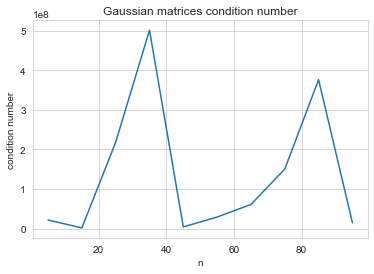

In [533]:
import seaborn as sns
sns.set_style('whitegrid')
plt.title('Gaussian matrices condition number')
plt.xlabel('n')
plt.ylabel('condition number')
plt.plot(n_grid, cond_numbers)
plt.show()

In [535]:
def lineq (L, U, b):
    for i in range(L.shape[0]):    # Ly = b 
        for j in range(i):
            b[i] -= L[i,j]*b[j]
    
    for i in range(U.shape[0]-1,-1,-1):     # Ux = y
        for j in range(i+1, U.shape[1]):
            b[i] -= U[i,j]*b[j]
        b[i] = b[i]/U[i,i]
    return b

In [540]:
A = np.random.normal(size=(10,10))
L_vec = CholetskyDecomposition(A @ A.T)
L_chol = np.zeros(A.shape)
idx = 0
for i in range(A.shape[0]):
    for j in range(i+1):
        L_chol[i,j] = L_vec[idx]
        idx+=1
lineq(L_chol, L_chol.T, np.ones(10))

array([ 1.26145424,  5.37499707, -0.01736889,  4.7466355 ,  1.95964262,
        5.24853832,  3.65574711,  0.84282625,  6.39041606, -0.63184527])

In [542]:
chol_errors = []
lu_errors = []
for n in tqdm(n_grid):
    chol_error = []
    lu_error = []
    for k in range(1000):
        A = np.random.normal(0,10,(n,n))
        L_vec = CholetskyDecomposition(A @ A.T)
        L_chol = np.zeros(A.shape)
        idx = 0
        for i in range(A.shape[0]):
            for j in range(i+1):
                L_chol[i,j] = L_vec[idx]
                idx+=1
        chol_error.append(np.sum((lineq(L_chol, L_chol.T, np.ones(n))-np.linalg.solve(A @ A.T, np.ones(n)))**2))
        lu = LU_no_pivot(A @ A.T)
        L = np.identity(A.shape[0])
        for i in range(1,A.shape[0]):
            for j in range(i):
                L[i,j] = lu[i,j]
                lu[i,j] = 0
        lu_error.append(np.sum((lineq(L, lu, np.ones(n))-np.linalg.solve(A @ A.T, np.ones(n)))**2))
        
    chol_errors.append(np.mean(chol_error))
    lu_errors.append(np.mean(lu_error))

KeyboardInterrupt: 

### Матрица Гильберта (15 баллов)

Матрица Гильберта -- это матрица $H=(h_{ij})$ с элементами  $h_{ij}=1/(i+j-1)$.

Докажите, что эта матрица положительно определена (5 баллов).
#### ВАШЕ РЕШЕНИЕ ЗДЕСЬ

*Докажем, что $\forall z \neq 0: z^T H z > 0$:*

$$z^T H z = \biggr(\sum\limits_{i=1}^{n}z_i \frac{1}{i+j-1}\biggr)_{j=1}^{n} \times z = \sum\limits_{i,j=1}^{n}z_i z_j \frac{1}{i+j-1}$$

*Заметим, что $\frac{1}{i+j-1} = \int\limits_0^1 t^{i+j-2}\,dt$. Тогда:*
$$z^T H z = \sum\limits_{i,j=1}^{n}z_i z_j \int\limits_{0}^{1}t^{i+j-2}\,dt = \int\limits_{0}^{1}\biggr(\sum\limits_{i,j=1}^{n}z_i z_j t^{i-1}t^{j-1}\biggr)\,dt = \int\limits_{0}^{1}\biggr(\sum\limits_{i,j=1}^{n}z_i t^{i-1}z_jt^{j-1}\biggr)\,dt = \int\limits_{0}^{1}\biggr(\sum\limits_{i=1}^{n}z_i t^{i-1}\sum\limits_{j=1}^{n}z_j t^{j-1}\biggr)\,dt=$$
$$=\int\limits_{0}^{1}\biggr(\sum\limits_{i=1}^{n}z_it^{i-1}\biggr)^2\,dt > 0$$

Нарисуйте два графика(10 баллов):
1. График числа обусловленности матрицы $H$ в зависимости от размера $n$;
2. График относительной ошибки решения c помощью $LU$ и разложения Холецкого системы уравнений с матрицей $H$ правой частью $f=1$.

In [126]:
from scipy.linalg import hilbert
n_grid = range(5,100,10)
hilbert_conds = [cond(hilbert(n)) for n in n_grid]

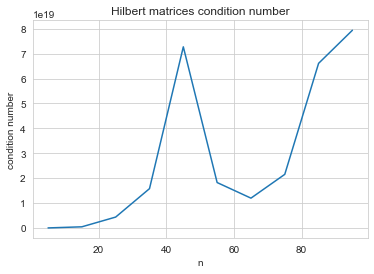

In [136]:
plt.plot(n_grid, hilbert_conds)
plt.title('Hilbert matrices condition number')
plt.xlabel('n')
plt.ylabel('condition number')
plt.show()

Сделайте выводы по проделанным экспериментам.

### Семплирование из гауссовского распределения с заданной ковариационной матрицей (15 баллов)

Очень частая задача в статистике -- семплирование из многомерного гауссовского распределения с заданной ковариацией. В частности, в регрессии гауссовскими процессами.

Вещественнозначным случайным процессом (проиндексированным некоторым абстрактным множеством $T$) назовём семейство случайных величин $(X_t)_{t \in T}$. Такой процесс называется гауссовским, если для любого $N$ и любых $N$ точек $t_i \in T, i=1,..,N$ совместное распределение величин $X_{t_i}$ является гауссовским. Любой гауссовский процесс определяется своими средним $\mu(t)= E\left[ X_t \right]$ и ковариационной функцией $K(t,s):=Cov(X_t,X_s)$, определённых для $t,s \in T$. Положим для простоты $T= R$, так процесс проиндексирован вещественной прямой.

Гауссовские процессы -- очень мощный интрумент регрессии, но про него расскажут в других курсах.

Давайте попробуем семплировать несколько траекторий такого процесса. Поскольку процесс -- гауссовский, семплирование сводится к семплированию из гауссовского распределения с заданным средним $\mu$ и ковариацией $\Sigma$.

Опишите и обоснуйте метод семплирования, который использует разложение Холецкого матрицы $\Sigma \in R^{n \times n}$ и принимает на вход семплы из стандартного гауссовского распределения $\mathcal{N}(0,1)^n$ (np.random.randn).

Имплементируйте класс GaussianProcess ниже.

Нарисуйте два графика:
1. Семплы на сетке ts траекторий белого шума $X_t \sim \mathcal{N}(0,1)$, можете использовать тот же класс с нулевым средним и ковариацией $K(t,t)=1, K(t,s)=0$ для всех $t \neq s$;
2. Семплы на сетке ts траекторий гауссовского процесса.

Для (2) попробуйте два разных средних $\mu(t)$ и (например) такие ковариационные функции:
1. Exp-Sine-Squared (с параметрами $p,l$)
$$
K(t,s) = exp\left\lbrace -2\left(\frac{sin(\pi/p \cdot \vert t-s \vert)}{l}\right)^2 \right\rbrace;
$$
2. Rational quadratic (с параметрами $\alpha, l$ )
$$
K(t,s)=\left(1+\frac{( t - s )^2}{2 \alpha l^2}\right)^{-\alpha}.
$$
Большой выбор ковариационных функций представлен в sklearn (https://scikit-learn.org/stable/modules/gaussian_process.html).

In [24]:
class GaussianProcess:
    def __init__(self, meanFunction, covarianceFunction):
        #meanFunction functionHandler: R -> R
        #covarianceFunction functionHandler: R x R -> R
        pass
    def Sample(self, ts, N):
        #ts [batch] -- time grid of points where the value of the process is required
        #N -- number of sampled trajectories
        pass

In [25]:
#YOUR DRAWINGS!